In [2]:
import pandas as pd

# Load the three CSV files into dataframes
d2rl_A2C = pd.read_csv('d2rl_A2C.csv')
d2rl_PPO = pd.read_csv('d2rl_PPO.csv')
epsilon_greedy_results = pd.read_csv('epsilon_greedy_results.csv')

# Display the first few rows of each dataframe to understand their structure
d2rl_A2C.head(), d2rl_PPO.head(), epsilon_greedy_results.head()


(   Episode   Reward
 0         1     450
 1         2     550
 2         3     650
 3         4     750
 4         5     600,
    Episode   Reward
 0         1     700
 1         2     650
 2         3     900
 3         4     450
 4         5     750,
    Episode   Reward
 0         1     750
 1         2     750
 2         3     600
 3         4     850
 4         5     800)

Calculate basic statistics for the "Reward" column in each CSV.
Visualize the reward distribution for each CSV.
Compare the average rewards across the three CSVs.
Determine which CSV file has the highest reward generation on average.
Let's start by calculating the basic statistics for the "Reward" column in each CSV file.​

In [3]:
# Calculate basic statistics for the "Reward" column in each CSV
d2rl_A2C_stats = d2rl_A2C['Reward'].describe()
d2rl_PPO_stats = d2rl_PPO['Reward'].describe()
epsilon_greedy_stats = epsilon_greedy_results['Reward'].describe()

d2rl_A2C_stats, d2rl_PPO_stats, epsilon_greedy_stats


(count    10000.00000
 mean       652.35000
 std        219.69935
 min       -550.00000
 25%        550.00000
 50%        700.00000
 75%        800.00000
 max        950.00000
 Name: Reward, dtype: float64,
 count    10000.000000
 mean       649.255000
 std        216.392878
 min       -450.000000
 25%        500.000000
 50%        700.000000
 75%        800.000000
 max        950.000000
 Name: Reward, dtype: float64,
 count    10000.000000
 mean       118.375000
 std       1731.603723
 min     -33750.000000
 25%        250.000000
 50%        550.000000
 75%        750.000000
 max        950.000000
 Name: Reward, dtype: float64)

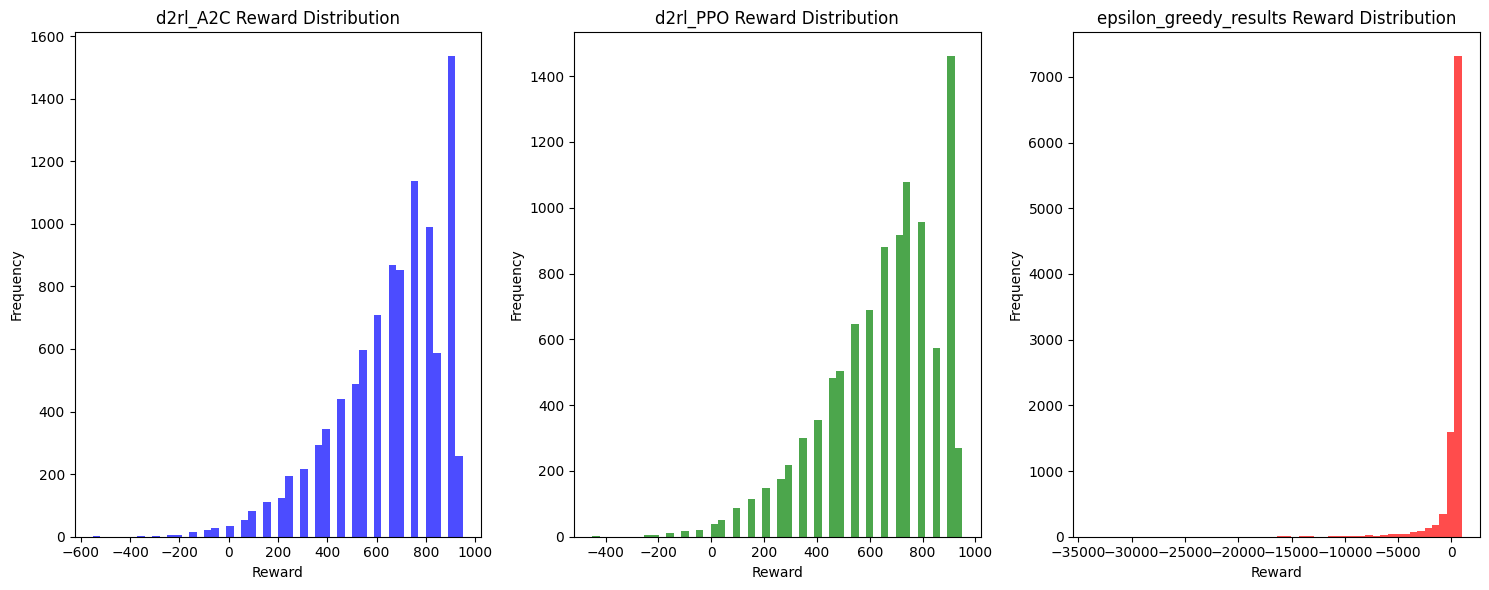

In [4]:
import matplotlib.pyplot as plt

# Set up the figure and axis
plt.figure(figsize=(15, 6))

# Plot the reward distributions
plt.subplot(1, 3, 1)
plt.hist(d2rl_A2C['Reward'], bins=50, color='blue', alpha=0.7)
plt.title('d2rl_A2C Reward Distribution')
plt.xlabel('Reward')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(d2rl_PPO['Reward'], bins=50, color='green', alpha=0.7)
plt.title('d2rl_PPO Reward Distribution')
plt.xlabel('Reward')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(epsilon_greedy_results['Reward'], bins=50, color='red', alpha=0.7)
plt.title('epsilon_greedy_results Reward Distribution')
plt.xlabel('Reward')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


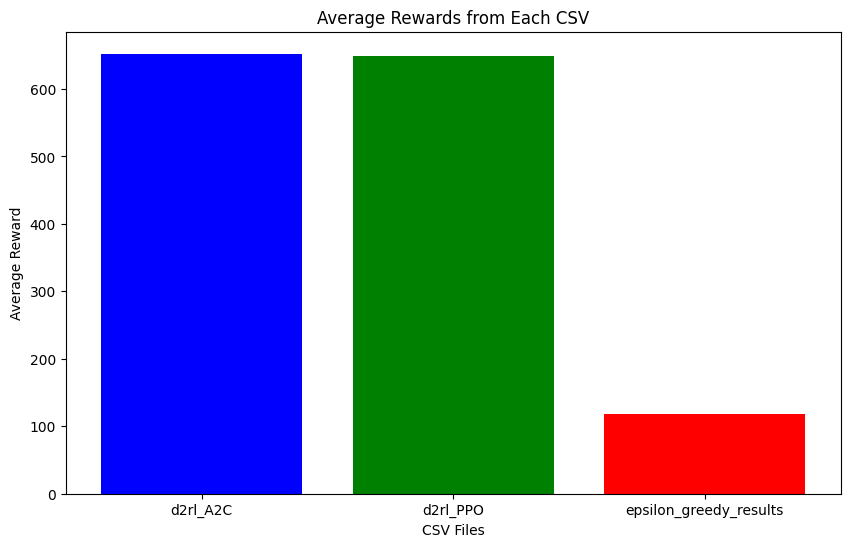

In [5]:
# Data for plotting average rewards
labels = ['d2rl_A2C', 'd2rl_PPO', 'epsilon_greedy_results']
means = [d2rl_A2C_stats['mean'], d2rl_PPO_stats['mean'], epsilon_greedy_stats['mean']]

# Plot the average rewards
plt.figure(figsize=(10, 6))
plt.bar(labels, means, color=['blue', 'green', 'red'])
plt.title('Average Rewards from Each CSV')
plt.ylabel('Average Reward')
plt.xlabel('CSV Files')
plt.show()


Distribution analysis

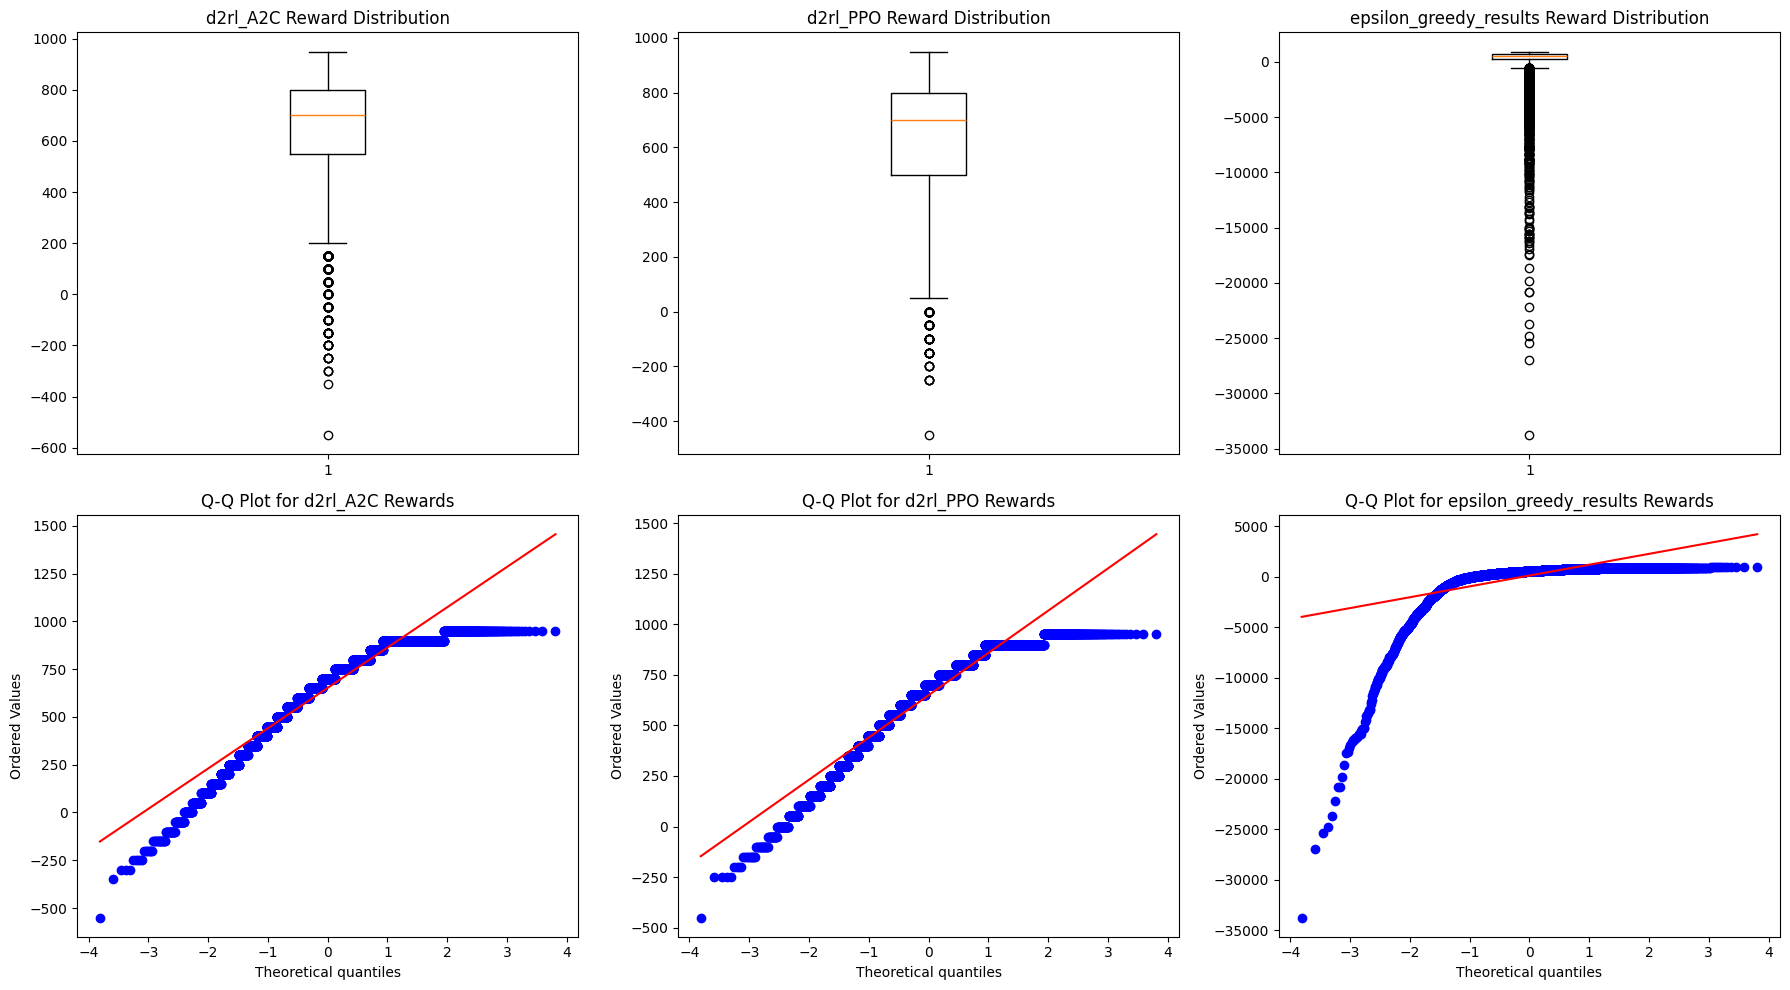

In [6]:
import scipy.stats as stats

# Set up the figure and axes
fig, ax = plt.subplots(2, 3, figsize=(18, 10))

# Box plots for reward distributions
ax[0, 0].boxplot(d2rl_A2C['Reward'])
ax[0, 0].set_title('d2rl_A2C Reward Distribution')
ax[0, 1].boxplot(d2rl_PPO['Reward'])
ax[0, 1].set_title('d2rl_PPO Reward Distribution')
ax[0, 2].boxplot(epsilon_greedy_results['Reward'])
ax[0, 2].set_title('epsilon_greedy_results Reward Distribution')

# Q-Q plots to check for normality
stats.probplot(d2rl_A2C['Reward'], plot=ax[1, 0])
ax[1, 0].set_title('Q-Q Plot for d2rl_A2C Rewards')
stats.probplot(d2rl_PPO['Reward'], plot=ax[1, 1])
ax[1, 1].set_title('Q-Q Plot for d2rl_PPO Rewards')
stats.probplot(epsilon_greedy_results['Reward'], plot=ax[1, 2])
ax[1, 2].set_title('Q-Q Plot for epsilon_greedy_results Rewards')

plt.tight_layout()
plt.show()


 Correlation Analysis

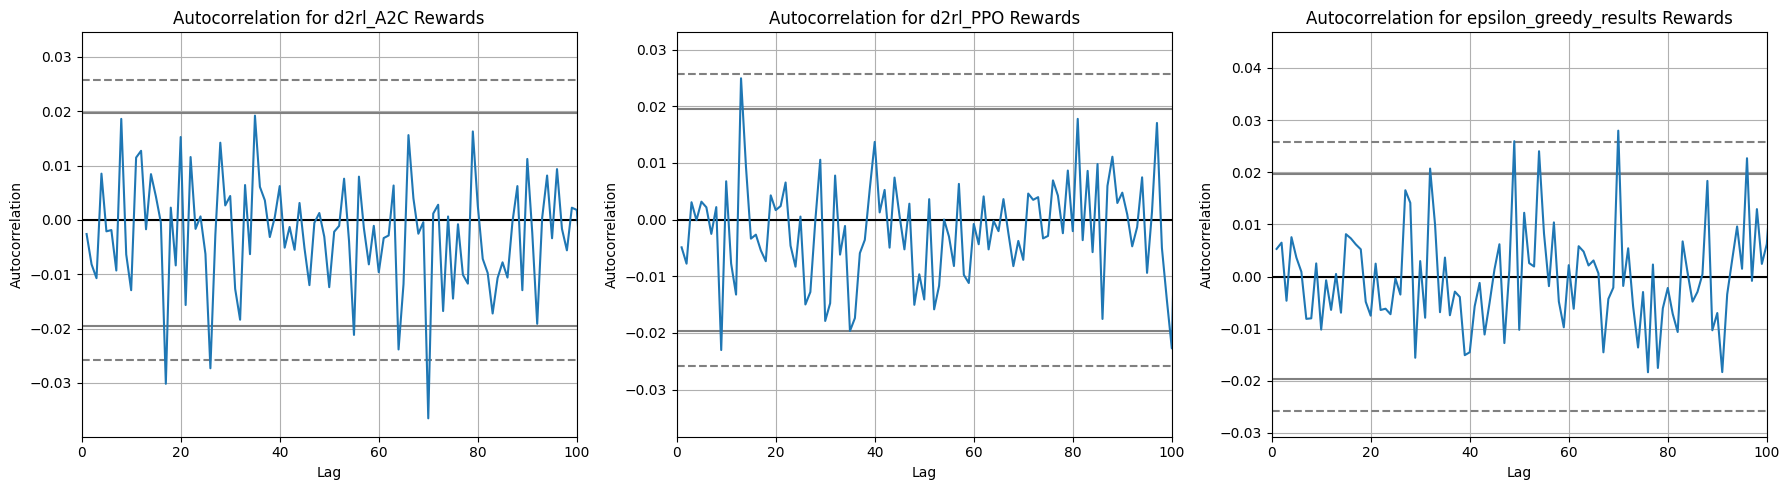

In [7]:
from pandas.plotting import autocorrelation_plot

# Set up the figure and axes
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Autocorrelation plots for each series
autocorrelation_plot(d2rl_A2C['Reward'], ax=ax[0])
ax[0].set_title('Autocorrelation for d2rl_A2C Rewards')
ax[0].set_xlim([0, 100])  # Limit to first 100 lags for clarity

autocorrelation_plot(d2rl_PPO['Reward'], ax=ax[1])
ax[1].set_title('Autocorrelation for d2rl_PPO Rewards')
ax[1].set_xlim([0, 100])  # Limit to first 100 lags for clarity

autocorrelation_plot(epsilon_greedy_results['Reward'], ax=ax[2])
ax[2].set_title('Autocorrelation for epsilon_greedy_results Rewards')
ax[2].set_xlim([0, 100])  # Limit to first 100 lags for clarity

plt.tight_layout()
plt.show()


Reward Density

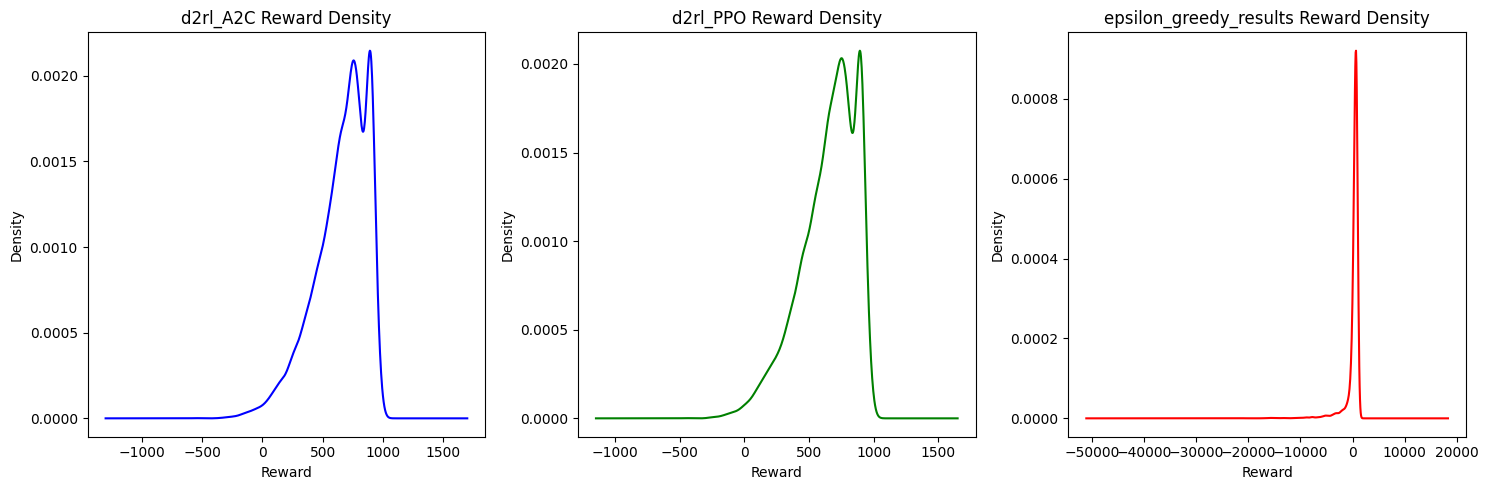

In [11]:
# Plotting density plots for each CSV
plt.figure(figsize=(15, 5))

# d2rl_A2C density plot
plt.subplot(1, 3, 1)
d2rl_A2C['Reward'].plot(kind='density', color='blue')
plt.title('d2rl_A2C Reward Density')
plt.xlabel('Reward')
plt.ylabel('Density')

# d2rl_PPO density plot
plt.subplot(1, 3, 2)
d2rl_PPO['Reward'].plot(kind='density', color='green')
plt.title('d2rl_PPO Reward Density')
plt.xlabel('Reward')
plt.ylabel('Density')

# epsilon_greedy_results density plot
plt.subplot(1, 3, 3)
epsilon_greedy_results['Reward'].plot(kind='density', color='red')
plt.title('epsilon_greedy_results Reward Density')
plt.xlabel('Reward')
plt.ylabel('Density')

plt.tight_layout()
plt.show()
